# Clinical task generation

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import string
from random import shuffle,seed,choices
from faker import Faker
from faker.providers.person.en import Provider
import networkx as nx
import itertools

from utils import Utils
from clinical_notes import TaskGenerator

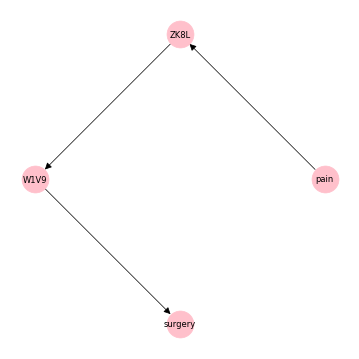


Context: Chronic disease K9PK6L sometimes requires surgical intervention, depending on genetics, patient history, vital signs, and lab results. The patient will experience significant pain (rated greater than or equal to 8/10) if they carry allele ZFTG, a genetic marker for severe K9PK6L. If the patient self-reports significant pain or the patient carries allele ZLAD, then vital ZK8L will be low (less than 0.9 mg/dL). If ZK8L is low or the patient carries allele UCTL, then vital W1V9 will be elevated (greater than 3.47 mg/dL). If W1V9 is elevated and the patient has a family history of 7KN3, then the surgeon will recommend surgery. Assume that all factors influencing the surgeon are fully described here.

Patient history: Now, we will review the history and physical notes for patient Nicholas Gilbert. History of Present Illness: Nicholas Gilbert is a 65-year-old male with K9PK6L who presented to the emergency department with acute onset pain that began 5 hours prior to arrival. Pain w

In [2]:
tg = TaskGenerator(n_per_bcc = [2,2,2], 
                   bcc_types = ["cycle", "wheel", "cycle"],)
context = tg.get_causal_context()
patient_history = tg.get_patient_history(n_extra_vars = 2)
true = tg.get_truth(intervene_node = None, intervene_value = 0)
print()
print("Context:", context)
print()
print("Patient history:", patient_history)
print()
#print("- True endogenous variable values:", true)
#print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())

In [3]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'surgery': {'Prompt': 'Given these history and physical notes, will the surgeon recommend surgery? Begin your response with True or False and be as concise as possible.',
  'True endogenous': {'pain': 0, 'ZK8L': 0, 'W1V9': 1, 'surgery': 1},
  'True exogenous': {'ZFTG': 0, 'ZLAD': 0, 'UCTL': 1, '7KN3': 1},
  'True response': 1},
 'ZK8L': {'Prompt': 'Given these history and physical notes, will vital ZK8L be low? Begin your response with True or False and be as concise as possible.',
  'True endogenous': {'pain': 0, 'ZK8L': 0, 'W1V9': 1, 'surgery': 1},
  'True exogenous': {'ZFTG': 0, 'ZLAD': 0, 'UCTL': 1, '7KN3': 1},
  'True response': 0},
 'W1V9': {'Prompt': 'Given these history and physical notes, will vital W1V9 be elevated? Begin your response with True or False and be as concise as possible.',
  'True endogenous': {'pain': 0, 'ZK8L': 0, 'W1V9': 1, 'surgery': 1},
  'True exogenous': {'ZFTG': 0, 'ZLAD': 0, 'UCTL': 1, '7KN3': 1},
  'True response': 1}}

In [4]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('pain', 'surgery') --
Prompt: Now suppose that the patient will be in significant pain regardless of all other circumstances. With this new assumption, will the surgeon recommend surgery? Begin your response with True or False and be as concise as possible.
True endogenous: {'pain': 1, 'ZK8L': 1, 'W1V9': 1, 'surgery': 1}
True exogenous: {'ZFTG': 0, 'ZLAD': 0, 'UCTL': 1, '7KN3': 1}
True response: 1

-----------------------

-- ('pain', 'ZK8L') --
Prompt: Now suppose that the patient will be in significant pain regardless of all other circumstances. With this new assumption, will vital ZK8L be low? Begin your response with True or False and be as concise as possible.
True endogenous: {'pain': 1, 'ZK8L': 1, 'W1V9': 1, 'surgery': 1}
True exogenous: {'ZFTG': 0, 'ZLAD': 0, 'UCTL': 1, '7KN3': 1}
True response: 1

-----------------------

-- ('pain', 'W1V9') --
Prompt: Now suppose that the patient will be in significant pai

In [5]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('pain', 'surgery') --
Prompt: Now suppose that the patient will not be in pain regardless of all other circumstances. With this new assumption, will the surgeon recommend surgery? Begin your response with True or False and be as concise as possible.
True endogenous: {'pain': 0, 'ZK8L': 0, 'W1V9': 1, 'surgery': 1}
True exogenous: {'ZFTG': 0, 'ZLAD': 0, 'UCTL': 1, '7KN3': 1}
True response: 1

-----------------------

-- ('pain', 'ZK8L') --
Prompt: Now suppose that the patient will not be in pain regardless of all other circumstances. With this new assumption, will vital ZK8L be low? Begin your response with True or False and be as concise as possible.
True endogenous: {'pain': 0, 'ZK8L': 0, 'W1V9': 1, 'surgery': 1}
True exogenous: {'ZFTG': 0, 'ZLAD': 0, 'UCTL': 1, '7KN3': 1}
True response: 0

-----------------------

-- ('pain', 'W1V9') --
Prompt: Now suppose that the patient will not be in pain regardless of all oth

In [6]:
df_obs, df_noise = tg.sample_scm(n = 3,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

,pain,ZK8L,W1V9,surgery
0,1,1,1,0
1,1,1,1,0
2,0,0,0,0


,ZFTG,ZLAD,UCTL,7KN3
0,1,0,1,0
1,1,0,1,0
2,0,0,0,1


## Generate dataset

In [7]:
# 4 levels of graphical complexity (captured by BCC size).
# 10 tasks per graphical complexity level.
# 100 samples per task.
# = 4k subtasks.
graph_sizes = [[2,2,2],[3,3,3],[4,4,4],[5,5,5]]
n_tasks_per_size = 10
n_samples_per_task = 100

dfs = []
for size in graph_sizes:
    
    for task in range(n_tasks_per_size):
    
        tg = TaskGenerator(n_per_bcc = size, 
                           bcc_types = ["cycle"]*len(size),
                           plot = False)
        context = [tg.get_causal_context()]*n_samples_per_task
        adj_dag = [tg.adj_dag]*n_samples_per_task
        nodes_dag = [tg.nodes]*n_samples_per_task
        adj_cct = [tg.adj_cct]*n_samples_per_task
        nodes_cct = [list(tg.cct.nodes())]*n_samples_per_task
        
        global_qs = [tg.get_global()]*n_samples_per_task
        local_qs = [tg.get_local()]*n_samples_per_task
        compositions = [tg.get_compositions()]*n_samples_per_task
        
        patient_histories = []
        factual_queries = []
        cf_1_queries = []
        cf_0_queries = []
        
        for i in range(n_samples_per_task):
            patient_histories.append(tg.get_patient_history(n_extra_vars = 2))
            factual_queries.append(tg.get_factual_queries())
            cf_1, cf_0 = tg.get_counterfactual_queries()
            cf_1_queries.append(cf_1)
            cf_0_queries.append(cf_0)
        
        df = pd.DataFrame({
            "Context ID": [task]*n_samples_per_task, 
            "Sample ID": range(n_samples_per_task),
            "Nodes per BCC": size[0],
            "Causal context": context, 
            "DAG adjacency matrix": adj_dag, 
            "DAG nodes": nodes_dag,
            "CCT adjacency matrix": adj_cct, 
            "CCT nodes": nodes_cct,
            "Global quantity": global_qs,
            "Local quantities": local_qs,
            "Compositions": compositions,
            "Patient history": patient_histories, 
            "Factual queries": factual_queries, 
            "Counterfactual queries (cause = True)": cf_1_queries, 
            "Counterfactual queries (cause = False)": cf_0_queries
        })
        df.insert(0, "Task ID",
                  ['.'.join(i) for i in zip(df["Context ID"].astype(str),df["Sample ID"].astype(str),df["Nodes per BCC"].astype(str))])
        dfs.append(df)

df = pd.concat(dfs).reset_index(drop = True)
display(df)

,Task ID,Context ID,Sample ID,Nodes per BCC,Causal context,DAG adjacency matrix,DAG nodes,CCT adjacency matrix,CCT nodes,Global quantity,Local quantities,Compositions,Patient history,Factual queries,Counterfactual queries (cause = True),Counterfactual queries (cause = False)
0,0.0.2,0,0,2,Chronic disease 3NCZQA sometimes requires surg...,"[[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...","[pain, 8URU, QBJW, surgery]","[[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...","[pain, 8URU, QBJW, surgery]","(pain, surgery)","[(pain, 8URU), (pain, QBJW), (8URU, QBJW), (8U...","[[(pain, 8URU), (8URU, QBJW), (QBJW, surgery)]...","Now, we will review the history and physical n...",{'surgery': {'Prompt': 'Given these history an...,"{('pain', 'surgery'): {'Prompt': 'Now suppose ...","{('pain', 'surgery'): {'Prompt': 'Now suppose ..."
1,0.1.2,0,1,2,Chronic disease 3NCZQA sometimes requires surg...,"[[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...","[pain, 8URU, QBJW, surgery]","[[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...","[pain, 8URU, QBJW, surgery]","(pain, surgery)","[(pain, 8URU), (pain, QBJW), (8URU, QBJW), (8U...","[[(pain, 8URU), (8URU, QBJW), (QBJW, surgery)]...","Now, we will review the history and physical n...",{'surgery': {'Prompt': 'Given these history an...,"{('pain', 'surgery'): {'Prompt': 'Now suppose ...","{('pain', 'surgery'): {'Prompt': 'Now suppose ..."
2,0.2.2,0,2,2,Chronic disease 3NCZQA sometimes requires surg...,"[[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...","[pain, 8URU, QBJW, surgery]","[[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...","[pain, 8URU, QBJW, surgery]","(pain, surgery)","[(pain, 8URU), (pain, QBJW), (8URU, QBJW), (8U...","[[(pain, 8URU), (8URU, QBJW), (QBJW, surgery)]...","Now, we will review the history and physical n...",{'surgery': {'Prompt': 'Given these history an...,"{('pain', 'surgery'): {'Prompt': 'Now suppose ...","{('pain', 'surgery'): {'Prompt': 'Now suppose ..."
3,0.3.2,0,3,2,Chronic disease 3NCZQA sometimes requires surg...,"[[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...","[pain, 8URU, QBJW, surgery]","[[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...","[pain, 8URU, QBJW, surgery]","(pain, surgery)","[(pain, 8URU), (pain, QBJW), (8URU, QBJW), (8U...","[[(pain, 8URU), (8URU, QBJW), (QBJW, surgery)]...","Now, we will review the history and physical n...",{'surgery': {'Prompt': 'Given these history an...,"{('pain', 'surgery'): {'Prompt': 'Now suppose ...","{('pain', 'surgery'): {'Prompt': 'Now suppose ..."
4,0.4.2,0,4,2,Chronic disease 3NCZQA sometimes requires surg...,"[[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...","[pain, 8URU, QBJW, surgery]","[[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...","[pain, 8URU, QBJW, surgery]","(pain, surgery)","[(pain, 8URU), (pain, QBJW), (8URU, QBJW), (8U...","[[(pain, 8URU), (8URU, QBJW), (QBJW, surgery)]...","Now, we will review the history and physical n...",{'surgery': {'Prompt': 'Given these history an...,"{('pain', 'surgery'): {'Prompt': 'Now suppose ...","{('pain', 'surgery'): {'Prompt': 'Now suppose ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,9.95.5,9,95,5,Chronic disease AN2JMB sometimes requires surg...,"[[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[pain, 0G63, JT3M, T1JD, ARWR, MKO9, Q9T7, GFS...","[[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...","[pain, ARWR, 3Z22, surgery]","(pain, surgery)","[(pain, ARWR), (pain, 3Z22), (ARWR, 3Z22), (AR...","[[(pain, ARWR), (ARWR, 3Z22), (3Z22, surgery)]...","Now, we will review the history and physical n...",{'surgery': {'Prompt': 'Given these history an...,"{('pain', 'surgery'): {'Prompt': 'Now suppose ...","{('pain', 'surgery'): {'Prompt': 'Now suppose ..."
3996,9.96.5,9,96,5,Chronic disease AN2JMB sometimes requires surg...,"[[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[pain, 0G63, JT3M, T1JD, ARWR, MKO9, Q9T7, GFS...","[[0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [...","[pain, ARWR, 3Z22, surgery]","(pain, surgery)","[(pain, ARWR), (pai

In [8]:
#df[df["Task ID"] == "0.0.2"]["Counterfactual queries (cause = True)"].item()

In [9]:
#df[df["Task ID"] == "0.0.2"]["Counterfactual queries (cause = False)"].item()

In [10]:
print(df.loc[0, "Task ID"])
print(df.loc[0, "Factual queries"])
print(df.loc[0, "Counterfactual queries (cause = True)"])
print(df.loc[0, "Counterfactual queries (cause = False)"])

0.0.2
{'surgery': {'Prompt': 'Given these history and physical notes, will the surgeon recommend surgery? Begin your response with True or False and be as concise as possible.', 'True endogenous': {'pain': 1, '8URU': 1, 'QBJW': 1, 'surgery': 0}, 'True exogenous': {'M0VX': 1, 'TK3A': 1, 'Q73J': 0, 'Y4O5': 0}, 'True response': 0}, '8URU': {'Prompt': 'Given these history and physical notes, will vital 8URU be low? Begin your response with True or False and be as concise as possible.', 'True endogenous': {'pain': 1, '8URU': 1, 'QBJW': 1, 'surgery': 0}, 'True exogenous': {'M0VX': 1, 'TK3A': 1, 'Q73J': 0, 'Y4O5': 0}, 'True response': 1}, 'QBJW': {'Prompt': 'Given these history and physical notes, will lab QBJW be low? Begin your response with True or False and be as concise as possible.', 'True endogenous': {'pain': 1, '8URU': 1, 'QBJW': 1, 'surgery': 0}, 'True exogenous': {'M0VX': 1, 'TK3A': 1, 'Q73J': 0, 'Y4O5': 0}, 'True response': 1}}
{('pain', 'surgery'): {'Prompt': 'Now suppose that th

In [11]:
dfs_fact = []
dfs_cf_1 = []
dfs_cf_0 = []

for row in range(len(df)):
    context_id = df.loc[row, "Context ID"]
    task_id = df.loc[row, "Task ID"]
    fact = df.loc[row, "Factual queries"]
    cf_1 = df.loc[row, "Counterfactual queries (cause = True)"]
    cf_0 = df.loc[row, "Counterfactual queries (cause = False)"]
    causal_context = df.loc[row, "Causal context"]
    patient_history = df.loc[row, "Patient history"]

    # Get factual prompt data.
    factual_effects = []
    factual_prompts = []
    factual_true = []
    for effect,q_dict in fact.items():
        factual_effects.append(effect)
        factual_prompts.append(" ".join([causal_context,patient_history,q_dict.get("Prompt")]))
        factual_true.append(q_dict.get("True response"))
    df_fact = pd.DataFrame({"Context ID": [context_id]*len(factual_effects),
                            "Task ID": [task_id]*len(factual_effects),
                            "Effect": factual_effects,
                            "Prompt": factual_prompts,
                            "True": factual_true})
    dfs_fact.append(df_fact)

    # Get counterfactual prompt data (intervention = True).
    cf_1_pairs = []
    cf_1_causes = []
    cf_1_effects = []
    cf_1_prompts = []
    cf_1_true = []
    for pair,q_dict in cf_1.items():
        cf_1_pairs.append(pair)
        cf_1_causes.append(pair[0])
        cf_1_effects.append(pair[1])
        cf_1_prompts.append(" ".join([causal_context,patient_history,q_dict.get("Prompt")]))
        cf_1_true.append(q_dict.get("True response"))
    df_cf_1 = pd.DataFrame({"Context ID": [context_id]*len(cf_1_effects),
                            "Task ID": [task_id]*len(cf_1_effects),
                            "Cause-effect pair": cf_1_pairs,
                            "Cause": cf_1_causes,
                            "Effect": cf_1_effects,
                            "Intervention": [1]*len(cf_1_effects),
                            "Prompt": cf_1_prompts,
                            "True": cf_1_true})
    dfs_cf_1.append(df_cf_1)

    # Get counterfactual prompt data (intervention = False).
    cf_0_pairs = []
    cf_0_causes = []
    cf_0_effects = []
    cf_0_prompts = []
    cf_0_true = []
    for pair,q_dict in cf_0.items():
        cf_0_pairs.append(pair)
        cf_0_causes.append(pair[0])
        cf_0_effects.append(pair[1])
        cf_0_prompts.append(" ".join([causal_context,patient_history,q_dict.get("Prompt")]))
        cf_0_true.append(q_dict.get("True response"))
    df_cf_0 = pd.DataFrame({"Context ID": [context_id]*len(cf_0_effects),
                            "Task ID": [task_id]*len(cf_0_effects),
                            "Cause-effect pair": cf_0_pairs,
                            "Cause": cf_0_causes,
                            "Effect": cf_0_effects,
                            "Intervention": [0]*len(cf_0_effects),
                            "Prompt": cf_0_prompts,
                            "True": cf_0_true})
    dfs_cf_0.append(df_cf_0)

df_fact = pd.concat(dfs_fact).reset_index(drop = True)
df_cf_1 = pd.concat(dfs_cf_1).reset_index(drop = True)
df_cf_0 = pd.concat(dfs_cf_0).reset_index(drop = True)

display(df_fact.head(10))
display(df_cf_1.head(10))
display(df_cf_0.head(10))

,Context ID,Task ID,Effect,Prompt,True
0,0,0.0.2,surgery,Chronic disease 3NCZQA sometimes requires surg...,0
1,0,0.0.2,8URU,Chronic disease 3NCZQA sometimes requires surg...,1
2,0,0.0.2,QBJW,Chronic disease 3NCZQA sometimes requires surg...,1
3,0,0.1.2,surgery,Chronic disease 3NCZQA sometimes requires surg...,1
4,0,0.1.2,8URU,Chronic disease 3NCZQA sometimes requires surg...,1
5,0,0.1.2,QBJW,Chronic disease 3NCZQA sometimes requires surg...,1
6,0,0.2.2,surgery,Chronic disease 3NCZQA sometimes requires surg...,1
7,0,0.2.2,8URU,Chronic disease 3NCZQA sometimes requires surg...,1
8,0,0.2.2,QBJW,Chronic disease 3NCZQA sometimes requires surg...,1
9,0,0.3.2,surgery,Chronic disease 3NCZQA sometimes requires surg...,1


,Context ID,Task ID,Cause-effect pair,Cause,Effect,Intervention,Prompt,True
0,0,0.0.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,0
1,0,0.0.2,"(pain, 8URU)",pain,8URU,1,Chronic disease 3NCZQA sometimes requires surg...,1
2,0,0.0.2,"(pain, QBJW)",pain,QBJW,1,Chronic disease 3NCZQA sometimes requires surg...,1
3,0,0.0.2,"(8URU, QBJW)",8URU,QBJW,1,Chronic disease 3NCZQA sometimes requires surg...,1
4,0,0.0.2,"(8URU, surgery)",8URU,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,0
5,0,0.0.2,"(QBJW, surgery)",QBJW,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,0
6,0,0.1.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,1
7,0,0.1.2,"(pain, 8URU)",pain,8URU,1,Chronic disease 3NCZQA sometimes requires surg...,1
8,0,0.1.2,"(pain, QBJW)",pain,QBJW,1,Chronic disease 3NCZQA sometimes requires surg...,1
9,0,0.1.2,"(8URU, QBJW)",8URU,QBJW,1,Chronic disease 3NCZQA sometimes requires surg...,1


,Context ID,Task ID,Cause-effect pair,Cause,Effect,Intervention,Prompt,True
0,0,0.0.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,0
1,0,0.0.2,"(pain, 8URU)",pain,8URU,0,Chronic disease 3NCZQA sometimes requires surg...,1
2,0,0.0.2,"(pain, QBJW)",pain,QBJW,0,Chronic disease 3NCZQA sometimes requires surg...,1
3,0,0.0.2,"(8URU, QBJW)",8URU,QBJW,0,Chronic disease 3NCZQA sometimes requires surg...,0
4,0,0.0.2,"(8URU, surgery)",8URU,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,0
5,0,0.0.2,"(QBJW, surgery)",QBJW,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,0
6,0,0.1.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,1
7,0,0.1.2,"(pain, 8URU)",pain,8URU,0,Chronic disease 3NCZQA sometimes requires surg...,1
8,0,0.1.2,"(pain, QBJW)",pain,QBJW,0,Chronic disease 3NCZQA sometimes requires surg...,1
9,0,0.1.2,"(8URU, QBJW)",8URU,QBJW,0,Chronic disease 3NCZQA sometimes requires surg...,0


In [12]:
print(df_fact.info())
print(df_cf_1.info())
print(df_cf_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Context ID  12000 non-null  int64 
 1   Task ID     12000 non-null  object
 2   Effect      12000 non-null  object
 3   Prompt      12000 non-null  object
 4   True        12000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 468.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Context ID         24000 non-null  int64 
 1   Task ID            24000 non-null  object
 2   Cause-effect pair  24000 non-null  object
 3   Cause              24000 non-null  object
 4   Effect             24000 non-null  object
 5   Intervention       24000 non-null  int64 
 6   Prompt             24000 non-null  object
 7   True               

In [13]:
df_cf_1[df_cf_1["Cause-effect pair"] == ('pain', 'surgery')]

,Context ID,Task ID,Cause-effect pair,Cause,Effect,Intervention,Prompt,True
0,0,0.0.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,0
6,0,0.1.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,1
12,0,0.2.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,1
18,0,0.3.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,1
24,0,0.4.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,1
...,...,...,...,...,...,...,...,...
23970,9,9.95.5,"(pain, surgery)",pain,surgery,1,Chronic disease AN2JMB sometimes requires surg...,1
23976,9,9.96.5,"(pain, surgery)",pain,surgery,1,Chronic disease AN2JMB sometimes requires surg...,1
23982,9,9.97.5,"(pain, surgery)",pain,surgery,1,Chronic disease AN2JMB sometimes requires surg...,1
23988,9,9.98.5,"(pain, surgery)",pain,surgery,1,Chronic disease AN2JMB sometimes requires surg...,1


In [14]:
df_fact["True"].value_counts()

True
1    9954
0    2046
Name: count, dtype: int64

In [15]:
df_cf_1["True"].value_counts()

True
1    18498
0     5502
Name: count, dtype: int64

In [16]:
df_cf_0["True"].value_counts()

True
1    14696
0     9304
Name: count, dtype: int64

In [17]:
df_test_1 = df_cf_1[df_cf_1["Context ID"] == 0]
df_test_0 = df_cf_0[df_cf_0["Context ID"] == 0]
df_test_fact = df_fact[df_fact["Context ID"] == 0]

In [18]:
df_test_1

,Context ID,Task ID,Cause-effect pair,Cause,Effect,Intervention,Prompt,True
0,0,0.0.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,0
1,0,0.0.2,"(pain, 8URU)",pain,8URU,1,Chronic disease 3NCZQA sometimes requires surg...,1
2,0,0.0.2,"(pain, QBJW)",pain,QBJW,1,Chronic disease 3NCZQA sometimes requires surg...,1
3,0,0.0.2,"(8URU, QBJW)",8URU,QBJW,1,Chronic disease 3NCZQA sometimes requires surg...,1
4,0,0.0.2,"(8URU, surgery)",8URU,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,0
...,...,...,...,...,...,...,...,...
18595,0,0.99.5,"(pain, 4W17)",pain,4W17,1,Chronic disease 5X2OMK sometimes requires surg...,1
18596,0,0.99.5,"(pain, VUUL)",pain,VUUL,1,Chronic disease 5X2OMK sometimes requires surg...,1
18597,0,0.99.5,"(4W17, VUUL)",4W17,VUUL,1,Chronic disease 5X2OMK sometimes requires surg...,1
18598,0,0.99.5,"(4W17, surgery)",4W17,surgery,1,Chronic disease 5X2OMK sometimes requires surg...,0


In [19]:
df_test_1 = df_test_1[(df_test_1["Cause"] == "pain") & (df_test_1["Effect"] == "surgery")]
df_test_0 = df_test_0[(df_test_0["Cause"] == "pain") & (df_test_0["Effect"] == "surgery")]

In [20]:
df_test_fact

,Context ID,Task ID,Effect,Prompt,True
0,0,0.0.2,surgery,Chronic disease 3NCZQA sometimes requires surg...,0
1,0,0.0.2,8URU,Chronic disease 3NCZQA sometimes requires surg...,1
2,0,0.0.2,QBJW,Chronic disease 3NCZQA sometimes requires surg...,1
3,0,0.1.2,surgery,Chronic disease 3NCZQA sometimes requires surg...,1
4,0,0.1.2,8URU,Chronic disease 3NCZQA sometimes requires surg...,1
...,...,...,...,...,...
9295,0,0.98.5,4W17,Chronic disease 5X2OMK sometimes requires surg...,1
9296,0,0.98.5,VUUL,Chronic disease 5X2OMK sometimes requires surg...,1
9297,0,0.99.5,surgery,Chronic disease 5X2OMK sometimes requires surg...,0
9298,0,0.99.5,4W17,Chronic disease 5X2OMK sometimes requires surg...,0


In [21]:
df_test_1

,Context ID,Task ID,Cause-effect pair,Cause,Effect,Intervention,Prompt,True
0,0,0.0.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,0
6,0,0.1.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,1
12,0,0.2.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,1
18,0,0.3.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,1
24,0,0.4.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,1
...,...,...,...,...,...,...,...,...
18570,0,0.95.5,"(pain, surgery)",pain,surgery,1,Chronic disease 5X2OMK sometimes requires surg...,1
18576,0,0.96.5,"(pain, surgery)",pain,surgery,1,Chronic disease 5X2OMK sometimes requires surg...,1
18582,0,0.97.5,"(pain, surgery)",pain,surgery,1,Chronic disease 5X2OMK sometimes requires surg...,1
18588,0,0.98.5,"(pain, surgery)",pain,surgery,1,Chronic disease 5X2OMK sometimes requires surg...,1


In [22]:
df_test_0

,Context ID,Task ID,Cause-effect pair,Cause,Effect,Intervention,Prompt,True
0,0,0.0.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,0
6,0,0.1.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,1
12,0,0.2.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,1
18,0,0.3.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,1
24,0,0.4.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,0
...,...,...,...,...,...,...,...,...
18570,0,0.95.5,"(pain, surgery)",pain,surgery,0,Chronic disease 5X2OMK sometimes requires surg...,1
18576,0,0.96.5,"(pain, surgery)",pain,surgery,0,Chronic disease 5X2OMK sometimes requires surg...,1
18582,0,0.97.5,"(pain, surgery)",pain,surgery,0,Chronic disease 5X2OMK sometimes requires surg...,1
18588,0,0.98.5,"(pain, surgery)",pain,surgery,0,Chronic disease 5X2OMK sometimes requires surg...,1


In [23]:
df_test_1.columns = ['Context ID', 'Task ID', 'Cause-effect pair', 'Cause', 'Effect', 'Intervention', 'Prompt', 'Y do 1']
df_test_0.columns = ['Context ID', 'Task ID', 'Cause-effect pair', 'Cause', 'Effect', 'Intervention', 'Prompt', 'Y do 0']

In [24]:
df_test_0.loc[0,"Prompt"]

'Chronic disease 3NCZQA sometimes requires surgical intervention, depending on genetics, patient history, vital signs, and lab results. The patient will experience significant pain (rated greater than or equal to 7/10) if they carry allele M0VX, a genetic marker for severe 3NCZQA. If the patient self-reports significant pain or the patient has previously received surgery for TK3A, then vital 8URU will be low (less than 0.87 mg/dL). If 8URU is low or the patient carries allele Q73J, then lab QBJW will be low (less than 1.38 mg/dL). If QBJW is low and the patient has previously received surgery for Y4O5, then the surgeon will recommend surgery. Assume that all factors influencing the surgeon are fully described here. Now, we will review the history and physical notes for patient Regina Mora. History of Present Illness: Regina Mora is a 61-year-old female with 3NCZQA who presented to the emergency department with acute onset pain that began 4 hours prior to arrival. Pain was rated 8/10. T

In [25]:
df_test_1.loc[0,"Prompt"]

'Chronic disease 3NCZQA sometimes requires surgical intervention, depending on genetics, patient history, vital signs, and lab results. The patient will experience significant pain (rated greater than or equal to 7/10) if they carry allele M0VX, a genetic marker for severe 3NCZQA. If the patient self-reports significant pain or the patient has previously received surgery for TK3A, then vital 8URU will be low (less than 0.87 mg/dL). If 8URU is low or the patient carries allele Q73J, then lab QBJW will be low (less than 1.38 mg/dL). If QBJW is low and the patient has previously received surgery for Y4O5, then the surgeon will recommend surgery. Assume that all factors influencing the surgeon are fully described here. Now, we will review the history and physical notes for patient Regina Mora. History of Present Illness: Regina Mora is a 61-year-old female with 3NCZQA who presented to the emergency department with acute onset pain that began 4 hours prior to arrival. Pain was rated 8/10. T

In [27]:
df_test = pd.concat([df_test_0,df_test_1])

In [28]:
df_test

,Context ID,Task ID,Cause-effect pair,Cause,Effect,Intervention,Prompt,Y do 0,Y do 1
0,0,0.0.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,0.0,NaN
6,0,0.1.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,1.0,NaN
12,0,0.2.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,1.0,NaN
18,0,0.3.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,1.0,NaN
24,0,0.4.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,0.0,NaN
...,...,...,...,...,...,...,...,...,...
18570,0,0.95.5,"(pain, surgery)",pain,surgery,1,Chronic disease 5X2OMK sometimes requires surg...,NaN,1.0
18576,0,0.96.5,"(pain, surgery)",pain,surgery,1,Chronic disease 5X2OMK sometimes requires surg...,NaN,1.0
18582,0,0.97.5,"(pain, surgery)",pain,surgery,1,Chronic disease 5X2OMK sometimes requires surg...,NaN,1.0
18588,0,0.98.5,"(pain, surgery)",pain,surgery,1,Chronic disease 5X2OMK sometimes requires surg...,NaN,1.0


In [32]:
df_test[df_test["Task ID"] == "0.0.2"]

,Context ID,Task ID,Cause-effect pair,Cause,Effect,Intervention,Prompt,Y do 0,Y do 1
0,0,0.0.2,"(pain, surgery)",pain,surgery,0,Chronic disease 3NCZQA sometimes requires surg...,0.0,NaN
0,0,0.0.2,"(pain, surgery)",pain,surgery,1,Chronic disease 3NCZQA sometimes requires surg...,NaN,0.0


In [29]:
u = Utils()
u.get_pns_direct(df_test, 
                 y_do_x0 = "Y do 0", 
                 y_do_x1 = "Y do 1")

0.22875

In [31]:
u.get_ate(df_test_1,
          df_test_0,
          y_do_x0 = "Y do 0", 
          y_do_x1 = "Y do 1")

0.050000000000000044